In [58]:
#functions to get values of performance metrices
def accuracy(cm):
    den = sum(sum(cm))
    if(den==0):
        return None
    return (cm[0][0]+cm[1][1])/den

def recall(cm):
    den = cm[0][0]+cm[1][0]
    if(den==0):
        return None
    return (cm[0][0])/den
    
def precision(cm):
    den = cm[0][0]+cm[0][1]
    if(den==0):
        return None
    return (cm[0][0])/den

def specificity(cm):
    den = cm[1][1]+cm[0][1]
    if(den==0):
        return None
    return (cm[1][1])/den
    
def f1_score(cm):
    den = precision(cm)+recall(cm)
    if(den==0):
        return None
    return (2 * precision(cm)*recall(cm))/den

In [59]:
import time
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [60]:
# load dataset
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('diabetes.csv', names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [61]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('K-Means', KMeans(n_clusters=2, random_state=1)))

In [62]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
final_results=[]
print("Confusion Matrices")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    t1=time.time()
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    t2=time.time()
    predictions = model_selection.cross_val_predict(model, X, Y, cv=kfold)
    cm = confusion_matrix(Y, predictions)
    print(name, ": ")
    print(cm)
    final_results.append({'name':name,
                             'accuracy':accuracy(cm),
                             'precision':precision(cm),
                             'recall':recall(cm),
                             'specificity':specificity(cm),
                             'f1_score':f1_score(cm),
                             'runtime':t2-t1})
    results.append(cv_results)
    names.append(name)

Confusion Matrices
LR : 
[[446  54]
 [123 145]]
KNN : 
[[415  85]
 [125 143]]
NB : 
[[420  80]
 [108 160]]
SVM : 
[[500   0]
 [268   0]]
K-Means : 
[[319 181]
 [159 109]]


In [63]:
#performance metrics
print("Performance Metrics")
final_results

Performance Metrics


[{'name': 'LR',
  'accuracy': 0.76953125,
  'precision': 0.892,
  'recall': 0.7838312829525483,
  'specificity': 0.7286432160804021,
  'f1_score': 0.8344246959775491,
  'runtime': 0.06260275840759277},
 {'name': 'KNN',
  'accuracy': 0.7265625,
  'precision': 0.83,
  'recall': 0.7685185185185185,
  'specificity': 0.6271929824561403,
  'f1_score': 0.798076923076923,
  'runtime': 0.015600204467773438},
 {'name': 'NB',
  'accuracy': 0.7552083333333334,
  'precision': 0.84,
  'recall': 0.7954545454545454,
  'specificity': 0.6666666666666666,
  'f1_score': 0.8171206225680934,
  'runtime': 0.015599966049194336},
 {'name': 'SVM',
  'accuracy': 0.6510416666666666,
  'precision': 1.0,
  'recall': 0.6510416666666666,
  'specificity': None,
  'f1_score': 0.7886435331230284,
  'runtime': 0.3166041374206543},
 {'name': 'K-Means',
  'accuracy': 0.5572916666666666,
  'precision': 0.638,
  'recall': 0.6673640167364017,
  'specificity': 0.3758620689655172,
  'f1_score': 0.6523517382413089,
  'runtime': 

In [64]:
#plots to determine performance
import seaborn as sns
import pandas as pd
df = pd.DataFrame(final_results)
df.head()

,accuracy,f1_score,name,precision,recall,runtime,specificity
0,0.769531,0.834425,LR,0.892,0.783831,0.062603,0.728643
1,0.726562,0.798077,KNN,0.830,0.768519,0.015600,0.627193
2,0.755208,0.817121,NB,0.840,0.795455,0.015600,0.666667
3,0.651042,0.788644,SVM,1.000,0.651042,0.316604,NaN
4,0.557292,0.652352,K-Means,0.638,0.667364,0.269601,0.375862


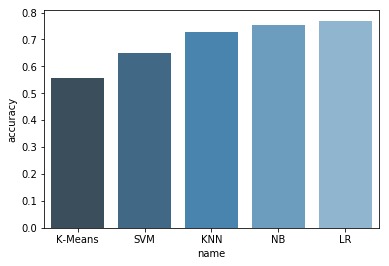

In [84]:
#Classifier algorithm vs Accuracy
data = df[['name','accuracy']]
data = data.sort_values('accuracy')
ax = sns.barplot(x="name", y="accuracy", data=data, palette="Blues_d")
plt.savefig("accuracy.png")

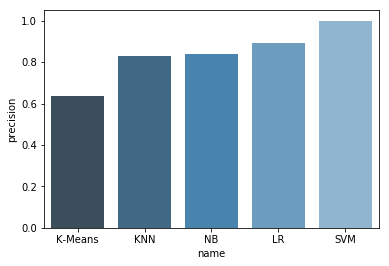

In [86]:
#Classifier algorithm vs Precision
data = df[['name','precision']]
data = data.sort_values('precision')
ax = sns.barplot(x="name", y="precision", data=data, palette="Blues_d")
plt.savefig("precision.png")

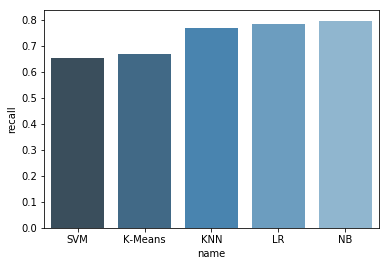

In [87]:
#Classifier algorithm vs Recall
data = df[['name','recall']]
data = data.sort_values('recall')
ax = sns.barplot(x="name", y="recall", data=data, palette="Blues_d")
plt.savefig("recall.png")

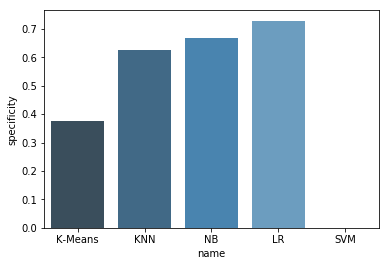

In [88]:
#Classifier algorithm vs Specificity
data = df[['name','specificity']]
data = data.sort_values('specificity')
ax = sns.barplot(x="name", y="specificity", data=data, palette="Blues_d")
plt.savefig("specificity.png")

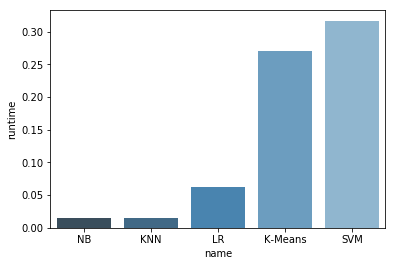

In [89]:
#Classifier algorithm vs Runtime
data = df[['name','runtime']]
data = data.sort_values('runtime')
ax = sns.barplot(x="name", y="runtime", data=data, palette="Blues_d")
plt.savefig("runtime.png")

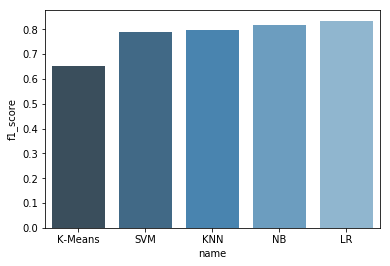

In [90]:
#Classifier algorithm vs F1 Score
data = df[['name','f1_score']]
data = data.sort_values('f1_score')
ax = sns.barplot(x="name", y="f1_score", data=data, palette="Blues_d")
plt.savefig("f1_score.png")